# Graphs

### Connected Components

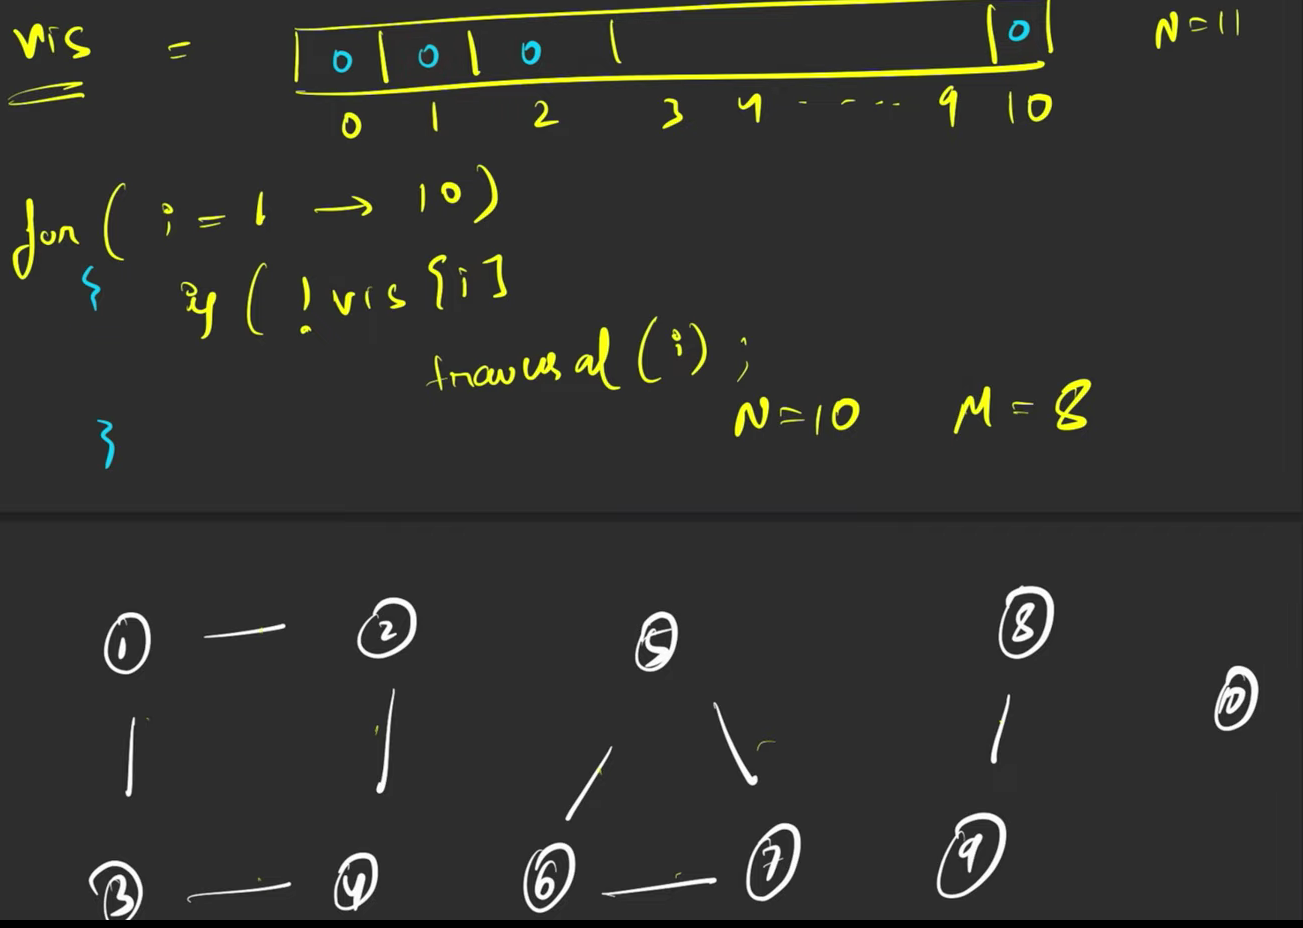

Key Points:

Connected Components Definition:

A connected component in an undirected graph is a maximal set of nodes such that there exists a path between any two nodes within this set. In simpler terms, it's a subgraph where all nodes are interconnected, and no additional nodes in the supergraph are connected to this subgraph.​

Identification Using Traversal Algorithms:

To identify all connected components in a graph, traversal algorithms like Depth-First Search (DFS) or Breadth-First Search (BFS) are employed. By initiating a traversal from an unvisited node, one can mark all reachable nodes, thereby identifying one connected component. Repeating this process for all unvisited nodes helps in discovering all connected components in the graph.​
Glasp

Role of the Visited Array:

A 'visited' array is utilized during traversal to keep track of nodes that have already been explored. This ensures that each node is processed only once, thereby preventing redundant operations and accurately counting the number of connected components.

In the figure above we can see their are 4 components of a graph which are not connected. All nodes in a component that are connected comprise the connected components. We also see the visited array and how to implement the traversal. Traversal algorithms are made so that the traverse all connected components.

### BFS

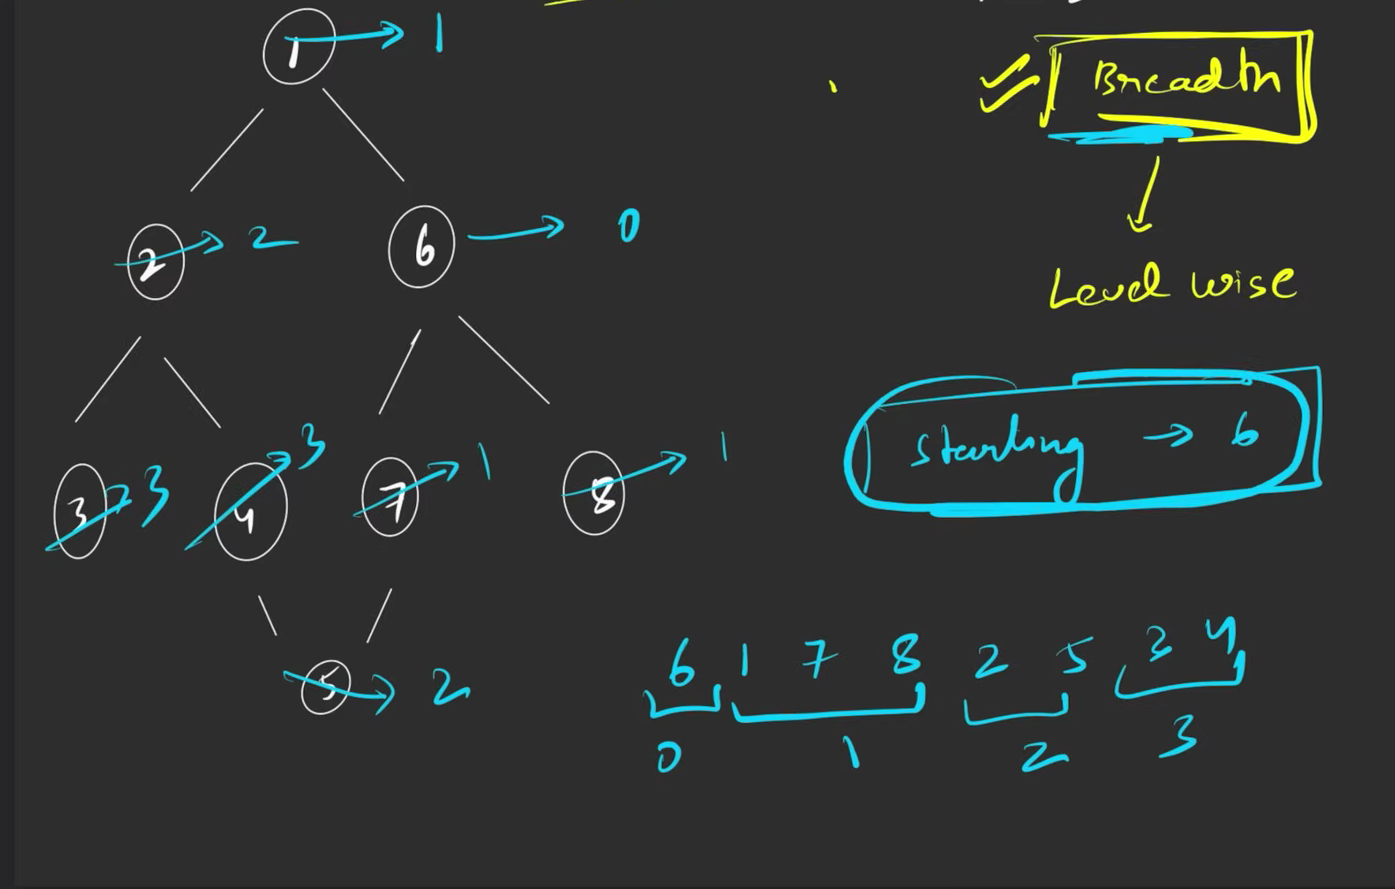

Level order Traversal if node 1 is the starting is known to us, similar to binary trees.
If the starting node is changed to say 6, all nodes equidistant from 6 at a distance of 1 will form the 2nd level, similarly at a distance of 2 will form the 3rd level

In [ ]:
# BFS Traversal of Graph

from collections import deque
from typing import List
class Solution:
    def bfs(self, adj: List[List[int]]) -> List[int]:
        # code here
        q=deque([0])
        vis=[0]*(len(adj))
        vis[0]=1
        bfs=[]
        while q:
            ele=q.popleft() # get the element and add to bfs
            bfs.append(ele)
            
            for node in adj[ele]: # iterate through all adjacent neighbours
                if vis[node]==0: # add to queue if not visited and mark as visited
                    vis[node]=1
                    q.append(node)
        return bfs

### DFS


- 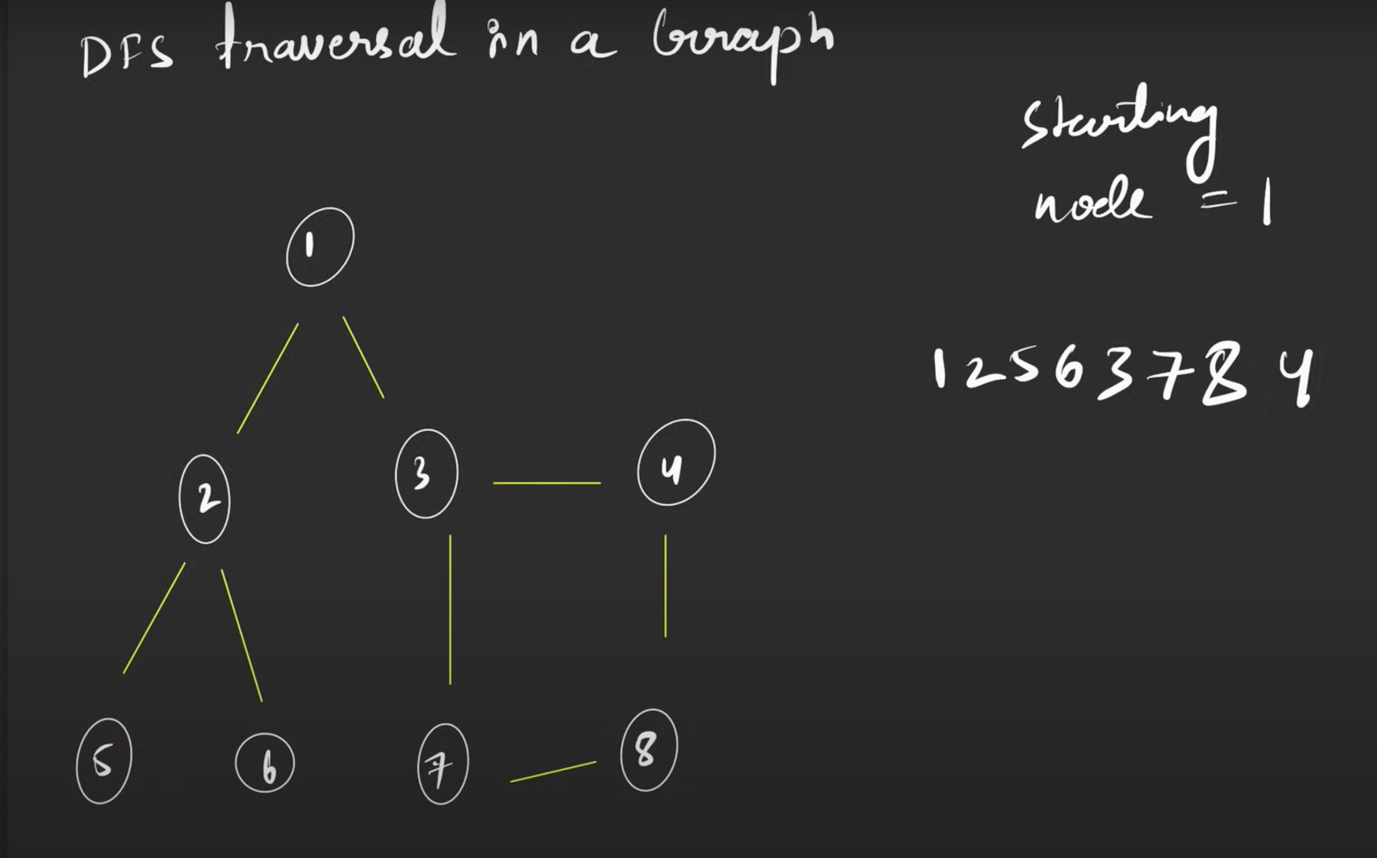
- 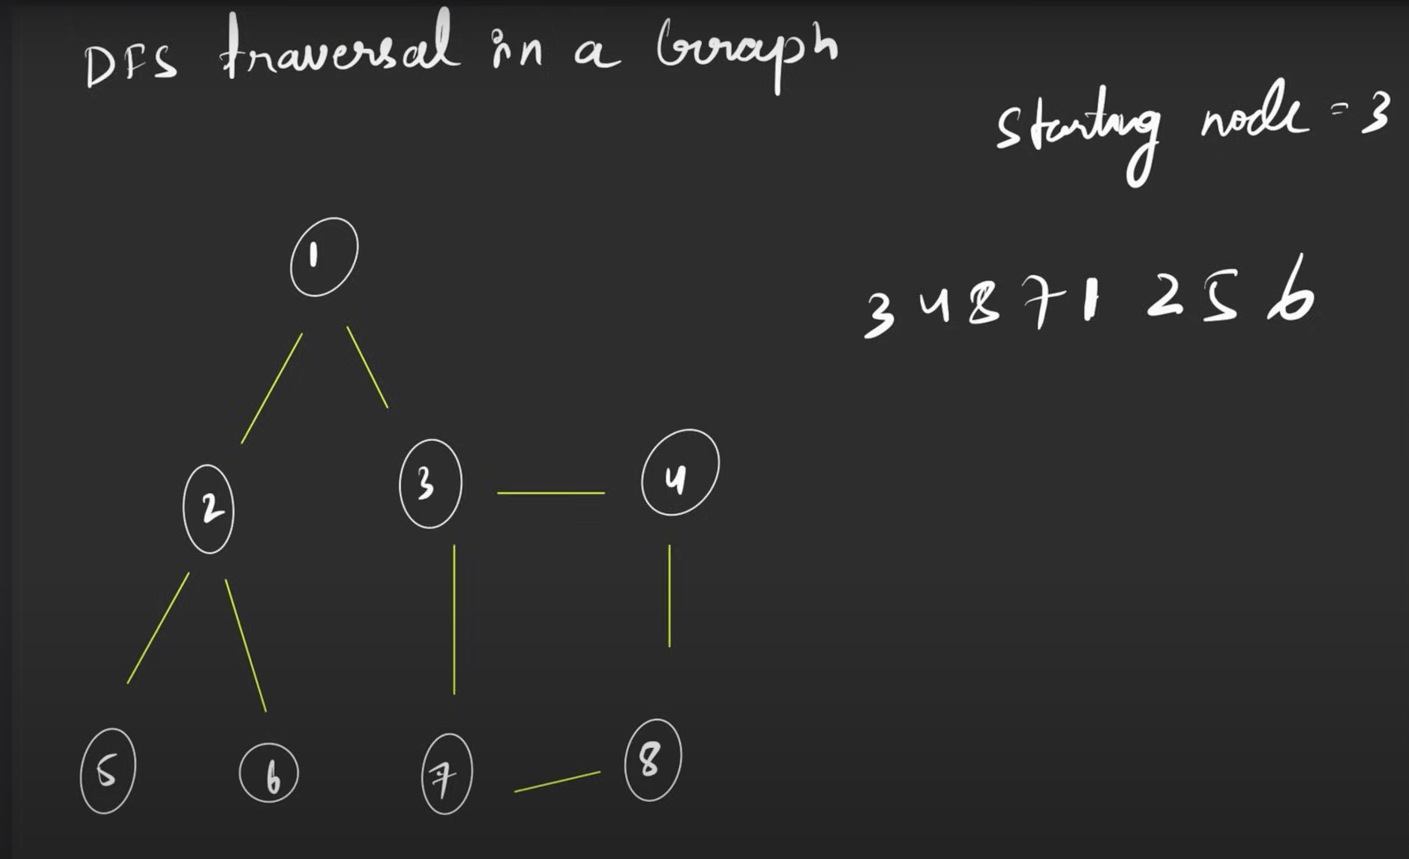

In [ ]:
# Depth First Search Traversal of Graph

class Solution:
    #Function to return a list containing the DFS traversal of the graph.
    def dfs(self,ele,adj,vis,lst):
        if vis[ele]:
            return 
        vis[ele]=1
        lst.append(ele)
        
        for node in adj[ele]: # function to visit all the neighbours of the current node
            if not vis[node]:
                self.dfs(node,adj,vis,lst)
    
    def DFS(self, adj):
        # code here
        vis=[0]*len(adj)
        lst=[]
        self.dfs(0,adj,vis,lst)
        return lst

In [ ]:
# No. of Connected Components  TC : O(N)+O(V+E)  SC : O(N)+O(N)
# Use DFS to visit every connected component of the graph and mark all the nodes in that component as visited.
# Count the number of times we start a DFS from an unvisited node, that will be the number of connected components.
class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        v=len(isConnected)
        vis=[0]*(v+1)
        def dfs(ele):
            if vis[ele]:
                return
            vis[ele]=1
            
            neighbours=isConnected[ele-1] # get the adjacency list from matrix
            for i in range(len(neighbours)):
                if neighbours[i] and not vis[i+1]:
                    dfs(i+1)
        cnt=0
        for i in range(1,v+1):
            if not vis[i]:  
                dfs(i)
                cnt+=1
        return cnt

In [ ]:
# Oranges Rotting 
# Every sec all the fresh oranges adjacent to rotten oranges become rotten.
# Find the time taken for all oranges to rot. If not possible return -1.

from collections import deque
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        # create a visited array, a queue and a counter for fresh oranges
        n,m=len(grid),len(grid[0])
        vis=[[0]*m for _ in range(n)]
        q=deque([])
        cntFresh=0
        # iterate through the grid and add all rotten oranges to the queue and mark them as visited, also count no. of fresh oranges
        for i in range(n):
            for j in range(m):
                if grid[i][j]==2:
                    q.append((i,j,0)) # (row,col,time)
                    vis[i][j]=2
                elif grid[i][j]==1:
                    cntFresh+=1

        t=0
        cnt=0
        while q:  # apply bfs traversal as all non-rotten oranges equidistant from rotten oranges will rot at the same time
            row,col,tm=q.popleft()
            t=max(t,tm)
            dcol,drow=[0,1,0,-1],[1,0,-1,0] # delta row and column
            for i in range(4):
                nrow=row+drow[i]
                ncol=col+dcol[i]
                # if nrow and ncol are valid,nt visited and contain a fresh orange, add to queue and mark as visited
                if nrow>=0 and nrow<n and ncol>=0 and ncol<m and vis[nrow][ncol]==0 and grid[nrow][ncol]==1:
                    q.append((nrow,ncol,tm+1))
                    vis[nrow][ncol]=2
                    cnt+=1
        
        if cnt<cntFresh:
            return -1
        return t

In [ ]:
# Flood Fill
# The **Flood Fill** problem requires changing the color of a starting pixel and all its connected (4-directionally adjacent) pixels of the same initial color to a new given color.
# The transformation continues until no more adjacent pixels of the original color remain.
from collections import deque
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]:
        n,m=len(image),len(image[0])
        vis=[[0]*m for _ in range(n)]
        q=deque([(sr,sc)])
        vis[sr][sc]=1
        original_color=image[sr][sc]
        image[sr][sc]=color # change the color of the starting pixel to the new color

        while q: # use BFS traversal to change the color of all pixels equidistant from the starting pixel
            r,c=q.popleft()
            drow,dcol=[0,1,0,-1],[1,0,-1,0]
            for i in range(4):
                nrow=r+drow[i]
                ncol=c+dcol[i]
                # if nrow and ncol are valid, not visited and contain the original color, add to queue, mark as visited and change its color
                if nrow>=0 and nrow<n and ncol>=0 and ncol<m and vis[nrow][ncol]==0 and image[nrow][ncol]==original_color:
                    vis[nrow][ncol]=1
                    image[nrow][ncol]=color
                    q.append((nrow,ncol))

        return image

In [ ]:
# Detect Cycle in Undirected Graph - BFS

from collections import deque
class Solution:
    def isCycle(self, v, edges):
        def detect(adj, vis, src):
            q = deque([(src, -1)])
            vis[src] = 1
            while q:
                ele, parent = q.popleft()
                
                for node in adj[ele]:
                    if not vis[node]:
                        vis[node] = 1
                        q.append((node, ele))
                    elif parent != node:  # If the node is visited but it's not the parent, cycle detected
                        return True
            return False
        # Adjacency list
        adj = {x: [] for x in range(v)}
        for u, w in edges:  # Changed variable name to avoid conflict with `v`
            adj[u].append(w)
            adj[w].append(u)
        vis = [0] * v  # Visited array
        # For graph with multiple components
        for i in range(v):
            if not vis[i]:
                if detect(adj, vis, i):
                    return True
        return False
    
# Detect Cycle in Undirected Graph - DFS

class Solution:
    def isCycle(self, v, edges):
        def dfs(node,parent):
            vis[node]=1
            # use dfs appraoch, if element is visited and not a parent,then cycle is present
            for ele in adj[node]:
                if not vis[ele]:
                    if dfs(ele,node):
                        return True
                elif ele!=parent:
                    return True
            return False
        # adjacency list and visited array
        adj={x:[] for x in range(v)}
        for u,w in edges:
            adj[u].append(w)
            adj[w].append(u)
        vis=[0]*v
        # for a graph with multiple components
        for i in range(v):
            if not vis[i]:
                if dfs(i,-1):
                    return True
        return False